In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
data_path = "data/passengers.csv"

In [24]:
import DataLoader, Machine_Model, Engine, Information
import torch

train_percent = 0.8
val_percent = 0.2
test_percent = None
batch_size = 300

dataloader = DataLoader.MyDataloader(file_path=data_path, train_percent=train_percent, val_percent=val_percent,
                                     test_percent=test_percent, batch_size=batch_size)
train, val, test = dataloader.fit()
try:
    print(len(train), len(val), len(test))
except:
    print(len(train), len(val))

# INPUT_SIZE = len(train.dataset[0][0][0])  # number of features
INPUT_SIZE = len(Information.features)
HIDDEN_UNITS = 8
OUTPUT_SIZE = 1

model0 = Machine_Model.CNN_V0(input_size=INPUT_SIZE, hidden_size=HIDDEN_UNITS, output_size=OUTPUT_SIZE)

EPOCHS = 1000
loss_fn = torch.nn.MSELoss()
learning_rate = 0.001
optimizer = torch.optim.Adam(model0.parameters(), learning_rate, weight_decay=0.00001)

engine = Engine.Machine_Engine(model=model0, train_dataloader=train, val_dataloader=val, test_dataloader=test)
model0_results = engine.train(loss_fn=loss_fn, optimizer=optimizer, epochs_num=EPOCHS, early_stop_patience=50,
                              writer=False, resolution=500)


1 1


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 1 | train: Loss 0.302491 Accuracy -4.2720 | validation: Loss 0.298857 Accuracy -7.7831
Epoch 2 | train: Loss 0.328540 Accuracy -4.7260 | validation: Loss 0.294383 Accuracy -7.6516
Epoch 3 | train: Loss 0.308844 Accuracy -4.3827 | validation: Loss 0.289962 Accuracy -7.5217
Epoch 4 | train: Loss 0.290927 Accuracy -4.0704 | validation: Loss 0.285577 Accuracy -7.3928
Epoch 5 | train: Loss 0.270131 Accuracy -3.7080 | validation: Loss 0.281292 Accuracy -7.2669
Epoch 6 | train: Loss 0.289546 Accuracy -4.0464 | validation: Loss 0.277010 Accuracy -7.1410
Epoch 7 | train: Loss 0.284859 Accuracy -3.9647 | validation: Loss 0.272752 Accuracy -7.0159
Epoch 8 | train: Loss 0.275248 Accuracy -3.7972 | validation: Loss 0.268537 Accuracy -6.8920
Epoch 9 | train: Loss 0.295218 Accuracy -4.1452 | validation: Loss 0.264350 Accuracy -6.7689
Epoch 10 | train: Loss 0.261663 Accuracy -3.5604 | validation: Loss 0.260209 Accuracy -6.6472
Epoch 11 | train: Loss 0.265922 Accuracy -3.6346 | validation: Loss 0

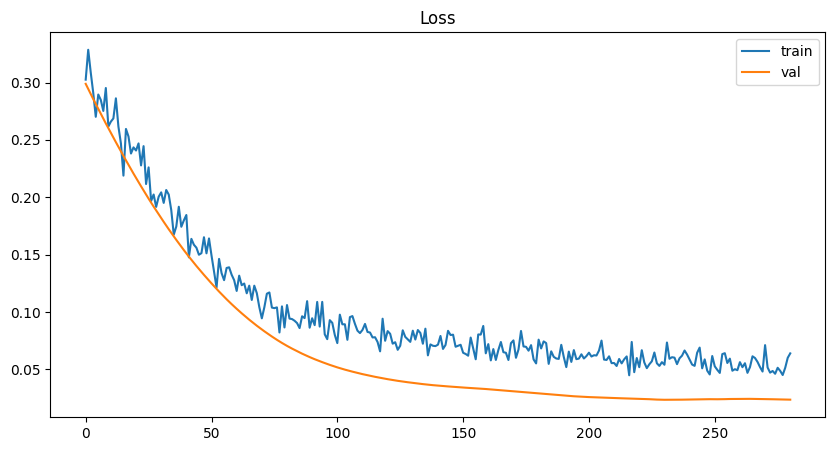

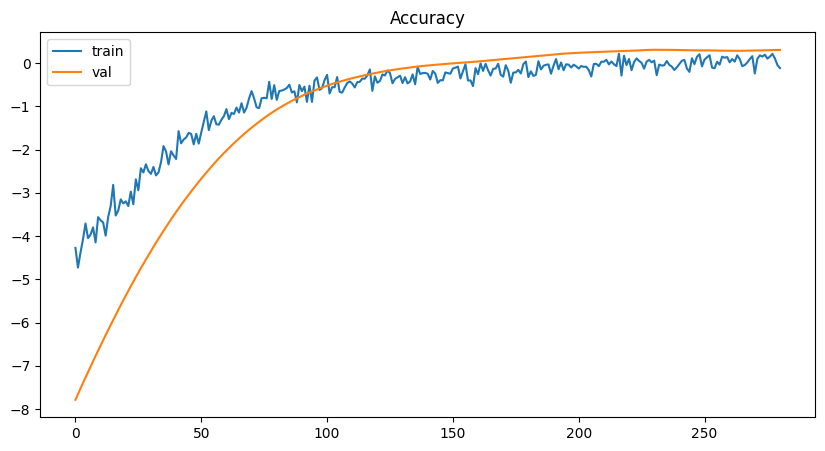

In [25]:
engine.plot_loss()
engine.plot_acc()

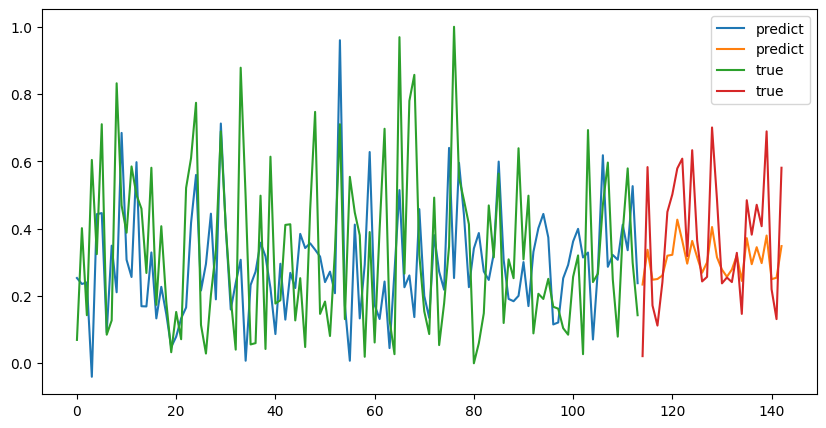

In [26]:
engine.plot_predict_real()

In [23]:
test_loss, test_acc, true_predict_list = engine.test(loss_fn=loss_fn)
test_acc

[!!!IMPORTANT NOTE!!!]
The test_function provided here is intended solely for the final model analysis and reporting purposes.
Please refrain from using it as a general-purpose function in your own projects. Always refer to
the appropriate train and validation data for developing and fine-tuning your own models.


0.7542276978492737

In [ ]:
engine.save()

In [104]:
%load_ext tensorboard
%tensorboard --logdir=runs

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard
